# Demo

Ezen notebook kiegészítséként szolgál a dolgozat 6. fejezetéhez.

A dolgozat során létrejött eredményeket egy python csomagban foglaltam össze, amelynek neve: _obinv_


A csomag osztályai:

- **InputHandler**

A bemeneti szöveg feldolgozásáért felelős osztály. A célja a bemeneti szövegtisztítása és a tokenek megalkotása.

    - Az osztály metódusai:
        - remove_puntuations
        - make_lowercase
        - tokenize_text
        - serialize_percentage_tokens
        - normalize_text

A normalize_text metódus az összes többi metódust meghívja a megfelelő sorrendben és visszaadja a végeredményt.

- **TokenHandler**

A tokenekek összehasonlító műveleteit megvalósító osztály. A tartalmazás mértékét [0, 1] között adja meg.

    - Az osztály metódusai:
        - compare_two_tokens
        - find_best_match_for_token_among_tokens

- **SynonymsLoader**

A json formátumban tárolt szinonímák betöltéséért felelős osztály.

    - Az osztály metódusai:
        - load_synonyms
    
Static metódust definiál

- **StructuredDataMaker**

A tokenekből való strukturált adatok megalkotásáért felelős osztály. Az osztályokat a szinoníma szótár szerint azonosítja.

Függősségei a beolvasott szinoníma szótár és a TokenHandler.

    - Az osztály metódusai:
        - find_classes
        - find_percentage_values
        - make_dict_from_classes
        - make_structured_data
    
A make_structured_data metódus a megfelelő sorrendben meghívja az osztály további metódusait, ezzel létrehozva a strukturált adatot a tokenekből.

- **Encoder**

A strukturált adatból one-hot reprezentációt előállító osztály.

    - Az osztály metódusai:
        - make_one_hot

- **ImageSynthetizer**

A képet előáálító osztály, függősége a generátor és a hozzá tartozó osztályozó. A képek előáálítását egy random pontból kezdi meg, majd az osztályozó segítségével gradiens módszerrel 

    - Az osztály metódusai:
        - gradient_descent_momentum

- **ModelLoader**

A betanított modellek betöltéséért felelős osztály.

    - Az osztály metódusai:
        - load_model

- **TextToImage**

A csomag azon osztálya, amely az eddig felsorolt összes funkcionalitáshoz hozzáférést biztosít.

    - Az osztály metódusai:
        - generate_image_from_text
        - show_result
        - plot_convergence
        
A csomag használatára ezen notebook kíván például szolgálni.

In [1]:
import matplotlib.pyplot as plt

from obinv.TextToImage import TextToImage

2022-05-03 14:39:47.205365: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-03 14:39:47.205403: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#generator_path = './datas/weights/msggan/newMSGmodel/msgGeneratornew.h5'
generator_path = './datas/weights/msggan/afhq/msgGenerator.h5' # Generator with a collapsed mode...
classifier_path = './datas/weights/classifier/animalFacesClassifier.h5'
synonyms_path = './datas/synonyms/afhq_synonyms.json'

animal_text_to_image = TextToImage(generator_path, classifier_path, synonyms_path)

2022-05-03 14:39:49.166635: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-03 14:39:49.166674: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-03 14:39:49.166711: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Inspiron-5558): /proc/driver/nvidia/version does not exist
2022-05-03 14:39:49.166955: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


tf.Tensor([[0.68106693 0.13187441 0.18705869]], shape=(1, 3), dtype=float32)
Step: 0, Loss: 2.025905132293701


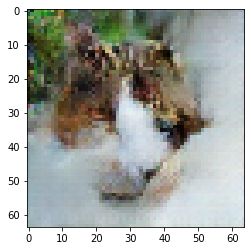

tf.Tensor([[0.8126045  0.05113107 0.13626444]], shape=(1, 3), dtype=float32)
Step: 1, Loss: 2.973362922668457


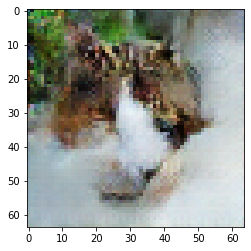

tf.Tensor([[0.83667415 0.05686165 0.10646417]], shape=(1, 3), dtype=float32)
Step: 2, Loss: 2.8671340942382812


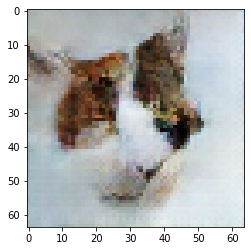

tf.Tensor([[0.9649415 0.0311866 0.0038719]], shape=(1, 3), dtype=float32)
Step: 3, Loss: 3.467766523361206


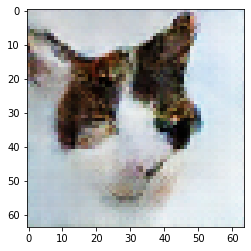

tf.Tensor([[0.8518502  0.10915623 0.03899352]], shape=(1, 3), dtype=float32)
Step: 4, Loss: 2.214975118637085


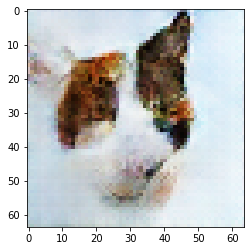

tf.Tensor([[0.07098397 0.9267843  0.00223171]], shape=(1, 3), dtype=float32)
Step: 5, Loss: 0.07603438943624496


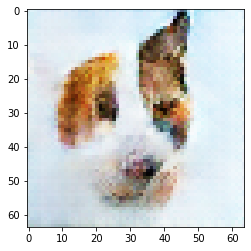

tf.Tensor([[5.2258749e-03 9.9442393e-01 3.5023285e-04]], shape=(1, 3), dtype=float32)
Step: 6, Loss: 0.005591678433120251


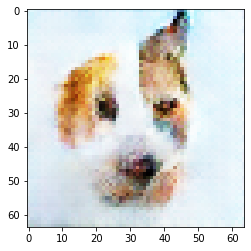

tf.Tensor([[2.5238872e-03 9.9674809e-01 7.2798814e-04]], shape=(1, 3), dtype=float32)
Step: 7, Loss: 0.00325720920227468


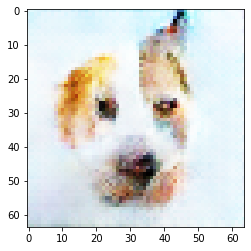

tf.Tensor([[0.06412498 0.92977357 0.00610137]], shape=(1, 3), dtype=float32)
Step: 8, Loss: 0.07281412929296494


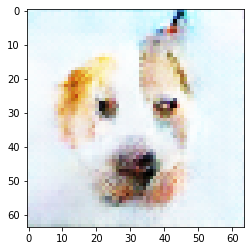

tf.Tensor([[6.8248692e-04 9.9920124e-01 1.1624500e-04]], shape=(1, 3), dtype=float32)
Step: 9, Loss: 0.0007990213925950229


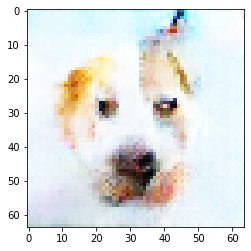

tf.Tensor([[0.00295242 0.9954426  0.001605  ]], shape=(1, 3), dtype=float32)
Step: 10, Loss: 0.004567787516862154


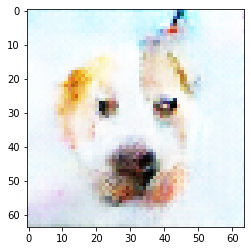

tf.Tensor([[1.4294822e-03 9.9819225e-01 3.7829857e-04]], shape=(1, 3), dtype=float32)
Step: 11, Loss: 0.0018093852559104562


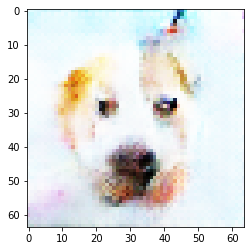

tf.Tensor([[0.06702204 0.9131293  0.01984851]], shape=(1, 3), dtype=float32)
Step: 12, Loss: 0.09087762236595154


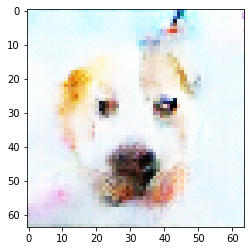

tf.Tensor([[2.6071107e-04 9.9952924e-01 2.1003855e-04]], shape=(1, 3), dtype=float32)
Step: 13, Loss: 0.0004708683118224144


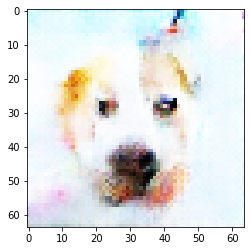

tf.Tensor([[8.9548637e-05 9.9978417e-01 1.2636285e-04]], shape=(1, 3), dtype=float32)
Step: 14, Loss: 0.0002159709547413513


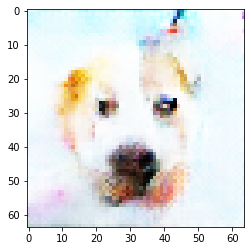

tf.Tensor([[9.0260895e-05 9.9986541e-01 4.4393470e-05]], shape=(1, 3), dtype=float32)
Step: 15, Loss: 0.00013459633919410408


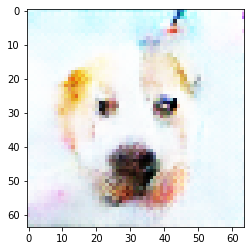

tf.Tensor([[6.0946284e-05 9.9986279e-01 7.6330776e-05]], shape=(1, 3), dtype=float32)
Step: 16, Loss: 0.00013733853120356798


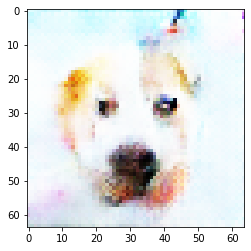

tf.Tensor([[0.07887886 0.9093204  0.01180069]], shape=(1, 3), dtype=float32)
Step: 17, Loss: 0.09505775570869446


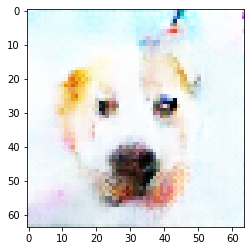

tf.Tensor([[9.3667032e-03 9.9033350e-01 2.9978523e-04]], shape=(1, 3), dtype=float32)
Step: 18, Loss: 0.00971352681517601


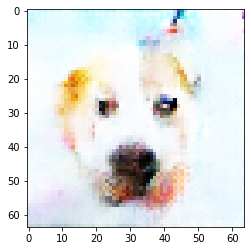

tf.Tensor([[0.00694344 0.98931307 0.00374348]], shape=(1, 3), dtype=float32)
Step: 19, Loss: 0.010744449682533741


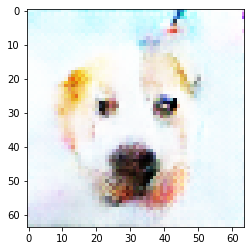

tf.Tensor([[2.07985649e-04 9.99690294e-01 1.01790734e-04]], shape=(1, 3), dtype=float32)
Step: 20, Loss: 0.0003097536973655224


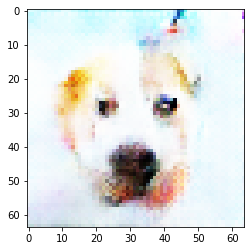

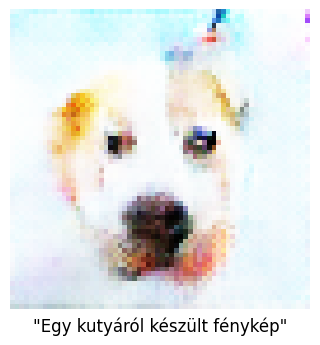

{'cat': 0.0, 'dog': 1.0, 'wild': 0.0}


In [11]:
input_sentence = "Egy kutyáról készült fénykép"

step_size = 0.05
momentum = 0.8
steps = 21

result_noises, losses, preds, structured_data = animal_text_to_image.generate_image_from_text(
    input_sentence,
    step_size=step_size, momentum=momentum, steps=steps, verbose=True
)

print(structured_data)

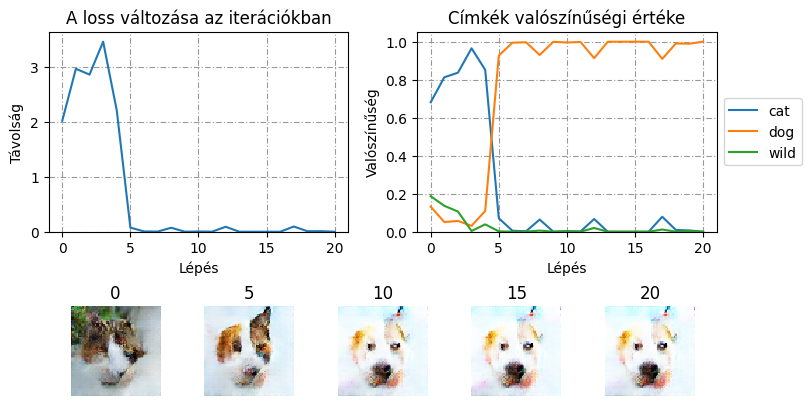

In [12]:
animal_text_to_image.plot_convergence(result_noises, losses, preds, 5)

In [5]:
generator_path = './datas/weights/msggan/cifar10/msgGeneratorCifar10.h5' # Generator with a collapsed mode...
classifier_path = './datas/weights/classifier/cifar10Classifier.h5'
synonyms_path = './datas/synonyms/cifar10_synonyms.json'

cifar_text_to_image = TextToImage(generator_path, classifier_path, synonyms_path)

tf.Tensor(
[[0.04268222 0.02184211 0.01032234 0.02340574 0.17461517 0.01964349
  0.00145151 0.6312269  0.05101091 0.02379953]], shape=(1, 10), dtype=float32)
Step: 0, Loss: 2.9757156372070312


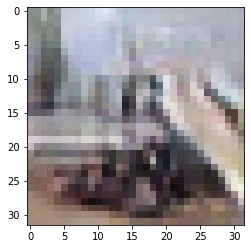

tf.Tensor(
[[0.21232961 0.03169566 0.00483153 0.01200689 0.0420105  0.00206272
  0.00203172 0.01358074 0.51539904 0.16405159]], shape=(1, 10), dtype=float32)
Step: 1, Loss: 0.6628138422966003


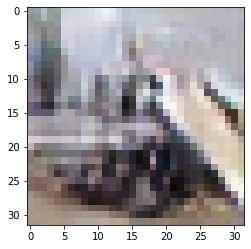

tf.Tensor(
[[5.2376244e-02 4.1116055e-04 6.4590998e-04 4.7365199e-03 4.2718250e-04
  5.0416333e-04 5.2470813e-04 1.3716264e-03 7.7176178e-01 1.6724074e-01]], shape=(1, 10), dtype=float32)
Step: 2, Loss: 0.25907936692237854


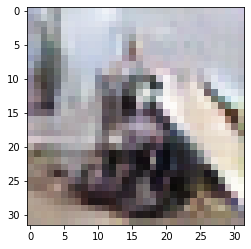

tf.Tensor(
[[6.0181148e-02 2.1075869e-04 6.1678624e-04 1.3614296e-02 2.5419248e-03
  6.0021819e-04 4.1664470e-04 1.2612763e-02 9.0745229e-01 1.7531496e-03]], shape=(1, 10), dtype=float32)
Step: 3, Loss: 0.09711429476737976


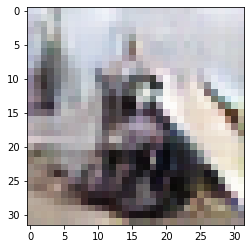

tf.Tensor(
[[1.5006211e-01 4.0870174e-04 1.4392009e-03 2.3294177e-02 5.4160734e-03
  8.2957884e-04 5.2515417e-04 3.7299618e-02 7.7953577e-01 1.1895873e-03]], shape=(1, 10), dtype=float32)
Step: 4, Loss: 0.24905669689178467


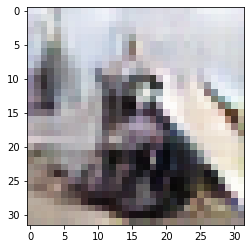

tf.Tensor(
[[0.05148832 0.00935806 0.00162998 0.00296069 0.00381516 0.00068497
  0.00095351 0.00403918 0.31779975 0.6072704 ]], shape=(1, 10), dtype=float32)
Step: 5, Loss: 1.1463338136672974


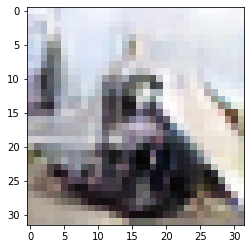

tf.Tensor(
[[2.6606557e-01 1.0035075e-04 1.9551201e-01 4.5022300e-01 2.7726114e-02
  2.4891885e-03 1.6400106e-03 8.1825471e-03 4.6185412e-02 1.8757645e-03]], shape=(1, 10), dtype=float32)
Step: 6, Loss: 3.0750913619995117


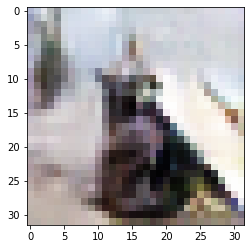

tf.Tensor(
[[0.23471916 0.00616021 0.33365864 0.09862067 0.02756875 0.013055
  0.02983177 0.05392489 0.19770807 0.00475286]], shape=(1, 10), dtype=float32)
Step: 7, Loss: 1.6209636926651


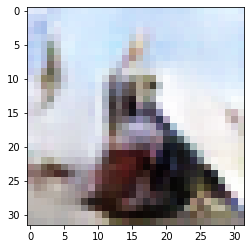

tf.Tensor(
[[0.38091868 0.00510844 0.00741497 0.02111233 0.00821976 0.00372305
  0.0013703  0.02339344 0.26197708 0.28676188]], shape=(1, 10), dtype=float32)
Step: 8, Loss: 1.3394981622695923


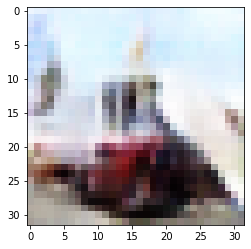

tf.Tensor(
[[8.2475191e-01 3.3514816e-03 1.2396138e-02 1.9654678e-03 2.8565565e-02
  1.1152020e-03 8.1093248e-04 3.5597730e-02 7.6490790e-02 1.4954714e-02]], shape=(1, 10), dtype=float32)
Step: 9, Loss: 2.570584774017334


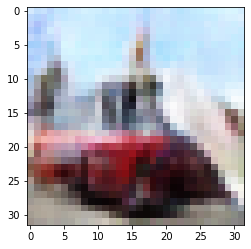

tf.Tensor(
[[1.8790558e-01 4.9648071e-03 2.1552094e-03 4.0802169e-03 1.4017512e-01
  1.4304180e-03 5.6605751e-04 3.3459436e-02 6.2261170e-01 2.6513676e-03]], shape=(1, 10), dtype=float32)
Step: 10, Loss: 0.47383221983909607


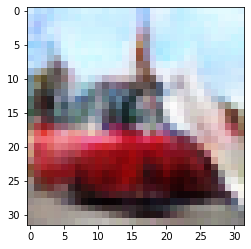

tf.Tensor(
[[1.10001145e-02 2.63892463e-04 3.74648545e-04 7.98820460e-04
  9.70304105e-03 2.99591949e-04 1.09710149e-04 3.41894920e-03
  9.73339856e-01 6.91357767e-04]], shape=(1, 10), dtype=float32)
Step: 11, Loss: 0.027021970599889755


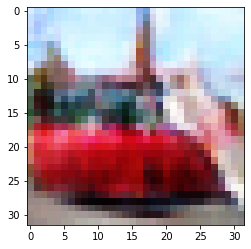

tf.Tensor(
[[0.02935284 0.00524731 0.00721861 0.02618889 0.0243861  0.0085763
  0.00108189 0.01394026 0.8759233  0.0080845 ]], shape=(1, 10), dtype=float32)
Step: 12, Loss: 0.13247670233249664


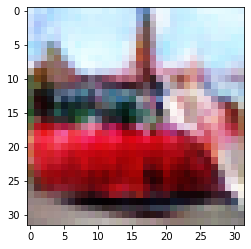

tf.Tensor(
[[0.02430029 0.0063543  0.00724868 0.01880159 0.01961176 0.00608851
  0.00101622 0.01147601 0.8973172  0.00778552]], shape=(1, 10), dtype=float32)
Step: 13, Loss: 0.1083458885550499


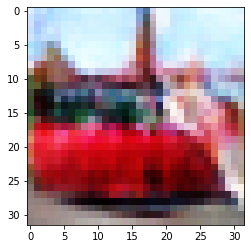

tf.Tensor(
[[0.02143662 0.00735112 0.00600704 0.01401274 0.01388005 0.00392706
  0.00092191 0.00883284 0.916837   0.00679372]], shape=(1, 10), dtype=float32)
Step: 14, Loss: 0.08682572841644287


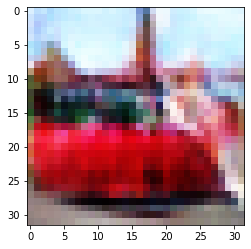

tf.Tensor(
[[1.6706865e-02 7.2763790e-03 4.4392105e-03 9.7136199e-03 9.5498096e-03
  2.6916109e-03 7.2049652e-04 6.5766582e-03 9.3630767e-01 6.0176924e-03]], shape=(1, 10), dtype=float32)
Step: 15, Loss: 0.0658111497759819


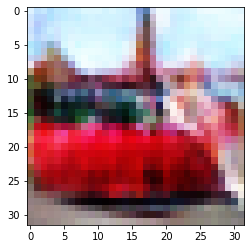

tf.Tensor(
[[1.3677783e-02 6.6228323e-03 3.1280762e-03 7.0861788e-03 7.0811529e-03
  1.8199601e-03 5.9236237e-04 4.7901412e-03 9.4984293e-01 5.3586238e-03]], shape=(1, 10), dtype=float32)
Step: 16, Loss: 0.05145864561200142


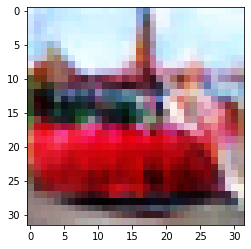

tf.Tensor(
[[1.1876161e-02 6.0286471e-03 2.5974861e-03 5.6082830e-03 6.0589616e-03
  1.3817700e-03 5.2171771e-04 3.8593148e-03 9.5709264e-01 4.9749170e-03]], shape=(1, 10), dtype=float32)
Step: 17, Loss: 0.0438549630343914


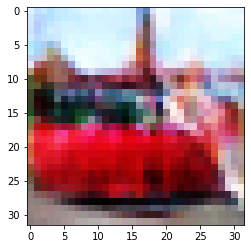

tf.Tensor(
[[1.0520743e-02 5.1237177e-03 2.2057556e-03 4.4800122e-03 5.0497740e-03
  1.0412695e-03 4.6467155e-04 3.0629975e-03 9.6363807e-01 4.4130073e-03]], shape=(1, 10), dtype=float32)
Step: 18, Loss: 0.03703950345516205


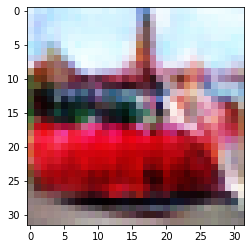

tf.Tensor(
[[9.6007343e-03 4.1338266e-03 1.7964770e-03 3.3290118e-03 4.0792031e-03
  7.3578639e-04 4.0732260e-04 2.3947579e-03 9.6977621e-01 3.7466693e-03]], shape=(1, 10), dtype=float32)
Step: 19, Loss: 0.030689941719174385


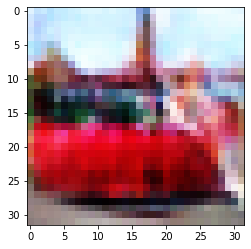

tf.Tensor(
[[9.0852436e-03 3.5611421e-03 1.6034648e-03 2.7053633e-03 3.6150271e-03
  5.5255240e-04 3.7544221e-04 1.9644750e-03 9.7316766e-01 3.3696014e-03]], shape=(1, 10), dtype=float32)
Step: 20, Loss: 0.027198901399970055


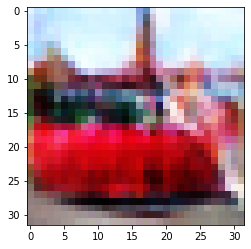

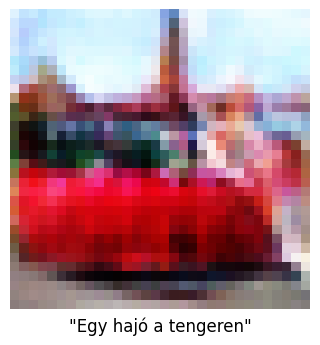

{'airplane': 0.0, 'automobile': 0.0, 'bird': 0.0, 'cat': 0.0, 'deer': 0.0, 'dog': 0.0, 'frog': 0.0, 'horse': 0.0, 'ship': 1.0, 'truck': 0.0}


In [9]:
input_sentence = "Egy hajó a tengeren"

step_size = 0.05
momentum = 0.5
steps = 21

result_noises, losses, preds, structured_data = cifar_text_to_image.generate_image_from_text(
    input_sentence,
    step_size=step_size, momentum=momentum, steps=steps, verbose=True
)

print(structured_data)

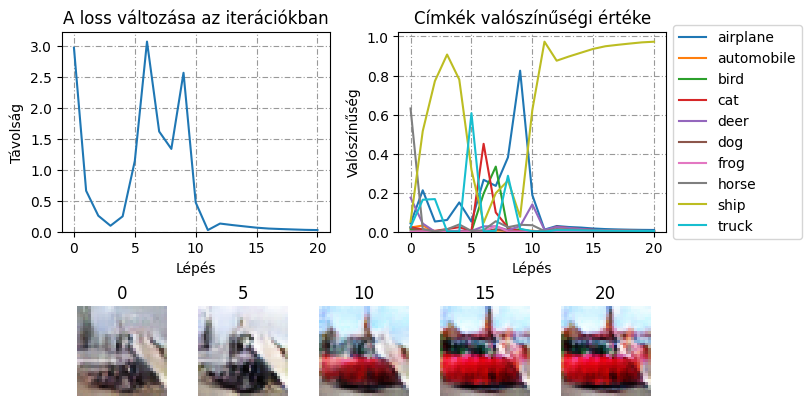

In [10]:
cifar_text_to_image.plot_convergence(result_noises, losses, preds, 5)